# Phase 2 Milestone 2

> Milestones ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Full Time Program Phase 2 khususnya pada Deep Learning.


# I - Perkenalan
> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

### Assignment Objectives

> Milestones 2 ini dibuat guna mengevaluasi Pembelajaran Phase 2 :

- Mampu memahami konsep Computer Vision/NLP.
- Mampu mempersiapkan data untuk digunakan dalam model Computer Vision/NLP
- Mampu mengimplementasikan Artificial Neural Network dengan data yang ada.
- Mampu menganalisis dan menjelaskan layer yang dibuat.


* Nama        : Muhamad Ivan

* Batch       : FTDS-013

* Dataset     : Gender Classification (https://www.kaggle.com/datasets/cashutosh/gender-classification-dataset)
* Objective   : Membuat Model yang dapat memprediksi gender seseorang berdasarkan gambar close-up

# II - Import Libraries
> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import PIL
import glob
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras.utils import load_img
from keras.models import Model,Sequential
from keras.layers import Input,Conv2D,MaxPooling2D,Dropout,Flatten,Dense,GlobalAveragePooling2D,BatchNormalization
from keras.callbacks import EarlyStopping,ModelCheckpoint

from sklearn.model_selection import train_test_split

# III - Data Loading
> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
#Load Data
female = glob.glob('C:/Users/ASUS TUF/Documents/9. Materi Data Scientist/FTDS013/Assignment/dataset P2M2/archive/Full_DS/female/*.*')
male = glob.glob('C:/Users/ASUS TUF/Documents/9. Materi Data Scientist/FTDS013/Assignment/dataset P2M2/archive/Full_DS/male/*.*')

data = []
labels = []

for i in female:   
    image=load_img(i, color_mode='rgb', 
    target_size= (96,96))
    image=np.array(image)
    data.append(image)
    labels.append(0)
for i in male:   
    image=load_img(i, color_mode='rgb', 
    target_size= (96,96))
    image=np.array(image)
    data.append(image)
    labels.append(1)


data = np.array(data)
labels = np.array(labels)

In [3]:
# Turn Labels into dataframe
df_labels = pd.DataFrame(labels,columns=['labels'])

In [4]:
# Showing Labels dataframe
df_labels

,labels
0,0
1,0
2,0
3,0
4,0
...,...
58653,1
58654,1
58655,1
58656,1


> Note:
1. Dilakukan loading data dari driectory local
2. Image diubah kedalam array dan dimasukan ke dalam variabel `array`
3. Label dari image tersebut dibuat menjadi dataframe dan dimasukan kedalam variabel `df_labels`
    - Foto wanita diberi label 0
    - Foto pria diberi label 1

# IV - Exploratory Data Analysis (EDA)
> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [5]:
# Count number of Male & Female Data
df_labels['labels'].value_counts()

1    29574
0    29084
Name: labels, dtype: int64

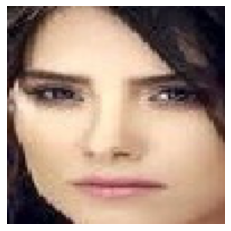

In [6]:
# Plotting sample of Pictures
plt.imshow(data[0], cmap="binary")
plt.axis('off')
plt.show()

> Insight:
- Pada dataframe `df_labels` dilakukan pengklasifikasian foto wanita dengan angka 0 dan foto pria dengan angka 1
- Persentase antara jumlah foto wanita dan pria yaitu 49.6% dan 50.4%
- Dilakukan display terhadap salah satu data image

# V - Data Preprocessing
> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-set dan inference-set, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## **A. Get Data for Model Inference**

In [7]:
# Get Data for Model Inference

x_train_test, x_inf,  y_train_test, y_inf = train_test_split(data, df_labels, shuffle=True, test_size=0.0002,random_state=17)

In [8]:
# Shape Checking Data Inferensial
y_inf

,labels
7042,0
45933,1
6108,0
27966,0
14322,0
30730,1
48013,1
52325,1
25552,0
4934,0


> Catatan:
- Dilakukan split terhadap data inferensi yang akan digunakan pada percobaan model inferensi

## **B. *Splitting Dataset***

In [9]:
# Splitting Data set into Train, Test, and Validation
x_train_full, x_test,  y_train_full, y_test = train_test_split(x_train_test, y_train_test, shuffle=True, test_size=0.2,random_state=17)

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, shuffle=True, test_size=0.2,random_state=17)

print("Training data shape: {}".format(x_train.shape))
print("Validation data shape: {}".format(x_val.shape))
print("Testing data shape: {}".format(x_test.shape))

Training data shape: (37532, 96, 96, 3)
Validation data shape: (9384, 96, 96, 3)
Testing data shape: (11730, 96, 96, 3)


> Catatan:
- Dilakukan pembagian dataset menjadi 3 set yaitu trainining, validaton, dan testing
- Dataset training berjumlah 37532 row.
- Dataset validation berjumlah 9384 row
- Dataset testing berjumlah 11730

## **C. *Image Preprocessing***

In [10]:
# Image Preprocessing for Training
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=30,
    fill_mode='nearest',
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.4,1.5],
    shear_range=0.2,
    zoom_range=0.3
    )

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

> Catatan:
- Pada kasus deteksi gender pada wajah bentuk wajah, variabel yang perlu diperhitungkan pada foto sangatlah beragam karena dapat berbeda tingkat pencahayaan, angle foto, penempatan wajah dalam sebuah foto, kondisi wajah terbalik, dan besarnya zoom.
-  Dengan banyaknya variabel tadi sebuah model harus dapat mendeteksi gender seseorang dengan sebaik-baiknya. Oleh karena itu digunakan teknik preprocessing diantaranya:
    1. `rescale`: digunakan untuk menormalisasi pixel
    2. `rotation_range`: digunakan untuk melatih model apabila sebuah wajah diambil dalam bentuk yang miring.
    3. `widght_shift` dan `height_shift`: digunakan untuk melatih model apabila foto wajah tidak berada tepat ditengah.
    4. `horizontal_flip` dan `vertical_flip`: digunakan untuk melatih model apabila foto terbalik.
    5. `brightness_range`: digunakan untuk melatih model dengan pencahayaan yang cukup ataupun kurang.
    6. `shear_range`: digunakan untuk melatih model dengan bentuk foto yang jajargenjang
    7. `zoom_range`: digunakan untuk melatih model dengan cara random yang berbeda.

# VI - Model Definition
> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

In [11]:
# Check x_train Shape
x_train.shape

(37532, 96, 96, 3)

In [12]:
# image input 
image_input = Input(shape=(96,96,3))

In [13]:
# Architectures Model of CNN 
x = Conv2D(32,(3,3),activation = "relu")(image_input)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.2)(x)

x = Conv2D(64,(3,3),activation = "relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.2)(x)

x = Conv2D(128,(3,3),activation = "relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.2)(x)

x = Flatten()(x)

x = Dense(256,activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

image_output = Dense(1,activation="sigmoid")(x)

cnn_model = Model(image_input,image_output)

In [14]:
# Summary Model
cnn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 94, 94, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 94, 94, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 47, 47, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 64)        18496 

In [15]:
# Backend Session
keras.backend.clear_session()

> Catatan:
- Dilakukan pembuatan arsitektur model CNN yang akan menjadi model base. Variabel model ini adalah cnn_model.
- Berikut penjelasan arsitektur model:
    1. `Conv2D` digunakan untuk pengolahan gambar dan dalam kasus ini wajah manusia yang bertipe RGB. Nilai 3,3 dipilih untuk mengecilkan pixel gambar namun tidak mengurangi bentuk aslinya. Penggunaan Neuron 32 dipilih berdasarkan kebebasan penulis yang terpenting jumlah neuron haruslah berada diantara jumlah input layer dan output layer.
    2. Penggunaan `batchnormalization` digunakan untuk menormalisasi layer sebelumnya agar dapat belajar secara mandiri.
    3. Penggunaan `maxpooling2D` digunakan untuk  menurunkan sampel representasi input (gambar, matriks hiddenlayer, dll). Dimensi yang lebih kecil akan memungkinkan terjadinya asumsi terhadap fitur pada suatu objek.
    4. `Dropout` digunakan untuk mematikan suatu persentase pada suatu neuron agar neuron yang lain berusaha mencari jalan lain. Hal ini terbukti meningkatkan akurasi.
    5. Pertambahan neuron pada setiap Conv2D disebakan karena terdapat rule of thumb untuk tiap-tiap layer pada pemrosesan image angkanya meningkat.
    6. Selanjutnya dilakukan `flatten` untuk merubah data menjadi 1 dimensi.
    7. `Dense` digunakan untuk menyambungkan layer flatten dengan output layer.
    8. Pada `image_output` digunakan activation sigmoid karena klasifikasi yang digunakan adalah binary (0 dan 1)


# VII - Model Training

#### **a. Model Training Computer Vision Before Improvement**

In [16]:
# Definition Callbacks
es = [EarlyStopping(monitor='val_loss', verbose=1,patience=2,restore_best_weights=True),
      ModelCheckpoint('model_best_cnn_base.hdf5', monitor='val_loss', save_best_only=True)
]

In [18]:
# Compiling the model
cnn_model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['acc'])

In [19]:
# Training the model
hist_cnn =  cnn_model.fit(train_datagen.flow(x_train,y_train,batch_size=64),
            validation_data=val_datagen.flow(x_val,y_val,batch_size=64),
            epochs=7,
            callbacks=[es])


Epoch 1/7
587/587 [==============================] - 247s 415ms/step - loss: 0.7052 - acc: 0.6343 - val_loss: 0.5366 - val_acc: 0.7251
Epoch 2/7
587/587 [==============================] - 238s 405ms/step - loss: 0.5729 - acc: 0.7038 - val_loss: 0.4782 - val_acc: 0.7597
Epoch 3/7
587/587 [==============================] - 236s 402ms/step - loss: 0.4717 - acc: 0.7762 - val_loss: 0.4251 - val_acc: 0.8117
Epoch 4/7
587/587 [==============================] - 234s 399ms/step - loss: 0.3719 - acc: 0.8346 - val_loss: 0.2133 - val_acc: 0.9160
Epoch 5/7
587/587 [==============================] - 249s 424ms/step - loss: 0.3178 - acc: 0.8641 - val_loss: 0.2540 - val_acc: 0.8986
Epoch 6/7
587/587 [==============================] - 250s 426ms/step - loss: 0.2920 - acc: 0.8771 - val_loss: 0.2282 - val_acc: 0.9096
Epoch 6: early stopping


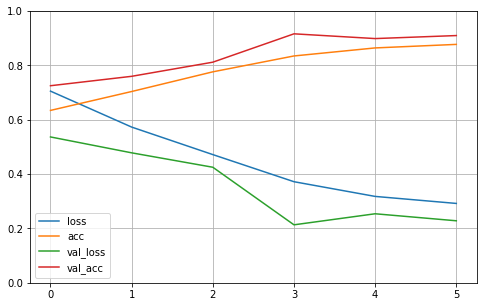

In [20]:
# Plotting history of the model
pd.DataFrame(hist_cnn.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

> Catatan:
1. Dilakukan training terhadap model `cnn_model`
2. Training model ini dibantu dengan earlystopping dan modelcheckpoint untuk mengefisiensikan waktu training.
3. Pada proses compile digunakan hyperparameter antara lain:
    - Optimizer = `adam` untuk kondisi awal `adam` direkomendasikan karena berdasarkan berbagai artikel adalah fungsi yang cukup stabil.
    - loss = digunakan binary_crossentrophy karena target dari model kasus ini adalah berbentuk binary yaitu `0` dan `1`
    - metrics = digunakan adalah accuracy karena paling sering digunakan dan sangat mudah interpretasinya.
4. Setelah itu dilakukan fit dengan sudah memasukan variabel ImageDataGenerator dengan epoch sebesar 7.
5. Setelah dilakukan plotting model ini secara visual memberikan nilai Over-Fit dengan persentase akurasi diatas 85%.

#### **b. Model Training Computer Vision with VGG16 (Improvement)**

In [21]:
# Definition & Import of Transfer Learning with Model VGG16
from keras.applications import VGG16

model= VGG16(include_top=False, weights='imagenet',input_shape=(96,96,3))

In [22]:
# Taking Weight of VGG16 Model to Train our model
x_train_vgg_output = model.predict(x_train,verbose=1)
x_val_vgg_output = model.predict(x_val,verbose=1)

294/294 [==============================] - 110s 373ms/step


In [23]:
# Shape checking of x_train_vgg_output & x_val_vgg_output 
print(x_train_vgg_output.shape)
print(x_val_vgg_output.shape)
x_train_vgg_output

(37532, 3, 3, 512)
(9384, 3, 3, 512)


array([[[[  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
           16.744646  ,   0.        ]],

        [[  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,  36.20933   ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   9.545727  ,
            3.9284852 ,   0.        ]],

        [[  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ]]],


  

In [24]:
# vgg_model arsitecture 
vgg_model = Sequential([
    Flatten(input_shape=[3,3,512]),
    Dense(256,activation = "relu"),
    Dropout(rate=0.5),
    Dense(1, activation = "sigmoid")
])

In [25]:
# Backend_clear
keras.backend.clear_session()

In [26]:
# Callbacks definition, compile, and training
es1 = [EarlyStopping(monitor='val_loss', verbose=1,patience=2,restore_best_weights=True),
      ModelCheckpoint('model_vgg.hdf5', monitor='val_loss', save_best_only=True)
]
vgg_model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

hist_vgg = vgg_model.fit(x_train_vgg_output,y_train,epochs=7,batch_size=64,validation_data=(x_val_vgg_output,y_val),callbacks=[es1])

Epoch 1/7
587/587 [==============================] - 4s 7ms/step - loss: 0.5762 - accuracy: 0.8941 - val_loss: 0.2003 - val_accuracy: 0.9276
Epoch 2/7
587/587 [==============================] - 4s 6ms/step - loss: 0.2079 - accuracy: 0.9253 - val_loss: 0.1870 - val_accuracy: 0.9309
Epoch 3/7
587/587 [==============================] - 4s 6ms/step - loss: 0.1819 - accuracy: 0.9325 - val_loss: 0.1741 - val_accuracy: 0.9358
Epoch 4/7
587/587 [==============================] - 3s 6ms/step - loss: 0.1710 - accuracy: 0.9367 - val_loss: 0.1776 - val_accuracy: 0.9368
Epoch 5/7
587/587 [==============================] - 3s 6ms/step - loss: 0.1598 - accuracy: 0.9397 - val_loss: 0.1765 - val_accuracy: 0.9369
Epoch 5: early stopping


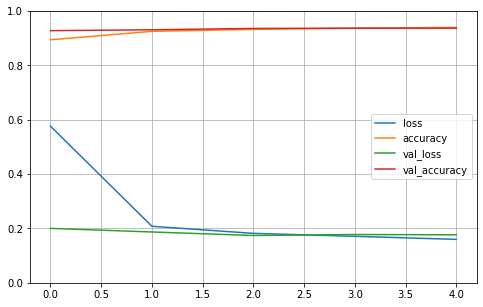

In [27]:
# Plotting history of the model
pd.DataFrame(hist_vgg.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

> Catatan:
1. Digunakan improvement model menggunakan transfer learning menggunakan VGG16.
2. Model VGG16 digunakan karena mencapai hampir 92,7% akurasi pengujian top-5 di ImageNet. ImageNet adalah kumpulan data yang terdiri dari lebih dari 14 juta gambar yang termasuk dalam hampir 1000 kelas. Model VGG16 menempati peringkat ke-2 pada keras application. VGG16 mensupport 16 layer dan dapat mengkategorikan 1000 gambar. Penulis menggunakan VGG16 dengan harapan dapat memberikan akurasi yang lebih baik dari CNN model karena weighting yang diberikan oleh VGG16 telah berdasarkan 14 pembelajaran 14 juta gambar.(source: https://viso.ai/deep-learning/vgg-very-deep-convolutional-networks/)
3. Berdasarkan proses belajar menggunakan weighting dari VGG16 didapatkan hasil Val Accuracy dan Accuracy yang jauh lebih baik dan mendekati `Good-Fit` dan proses belajar yang jauh lebih cepat.

# VIII - Model Evaluation
> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

#### **A. Model Evaluation Before Improvement**

In [28]:
eval_test_cnn=cnn_model.evaluate(x_test,y_test)
eval_train_cnn=cnn_model.evaluate(x_train,y_train)
print(f'Nilai Accuracy Model CNN Testing (sebelum Improvement) = {round((eval_test_cnn[1]),3)} ')
print(f'Nilai Accuracy Model CNN Testing (sebelum Improvement) = {round((eval_train_cnn[1]),3)} ')

1173/1173 [==============================] - 49s 42ms/step - loss: 26.5735 - acc: 0.8175
Nilai Accuracy Model CNN Testing (sebelum Improvement) = 0.82 
Nilai Accuracy Model CNN Testing (sebelum Improvement) = 0.817 


> Catatan:
1. Nilai Accuracy dari cnn_Model yaitu Accuracy Training: 82% dan Accuracy Testing: 82%.
2. Besarnya selisih Accuracy Training dan Testing sebesar 0%.
3. Berdasarkan subjektifitas penulis, model ini adalah `Good-Fit`

#### **B. Model Evaluation After Improvement**

In [29]:
x_test_vgg_output = model.predict(x_test,verbose=1)

367/367 [==============================] - 147s 402ms/step


In [30]:
eval_test_vgg=vgg_model.evaluate(x_test_vgg_output,y_test)
eval_train_vgg=vgg_model.evaluate(x_train_vgg_output,y_train)
print(f'Nilai Accuracy VGG16 Testing (setelah Improvement) = {round((eval_test_vgg[1]),3)} ')
print(f'Nilai Accuracy VGG16 Training (setelah Improvement) = {round((eval_train_vgg[1]),3)} ')

1173/1173 [==============================] - 2s 1ms/step - loss: 0.1273 - accuracy: 0.9534
Nilai Accuracy VGG16 Testing (setelah Improvement) = 0.936 
Nilai Accuracy VGG16 Training (setelah Improvement) = 0.953 


> Catatan:
1. Nilai Accuracy dari vgg_model yaitu Accuracy Training: 95% dan Accuracy Testing: 94%.
2. Besarnya selisih Accuracy Training dan Testing sebesar 1%.
3. Berdasarkan subjektifitas penulis, model ini adalah `Good-Fit`

##### **C. Pemilihan Model Terbaik**
> Keterangan:
1. Model terbaik dipilih berdasarkan accuracy terbaik.
2. Berdasarkan kriteria tersebut dipilih vgg_model karena memberikan accuracy Training dan Testing terbaik.
3. `vgg_model` bernilai `Good-Fit`baik pada klasifikasi perempuan dan pria karena data ini cukup balance.
4. Model terpilih akan digunakan untuk melakukan prediksi data inference.

# IX - Model Saving

In [31]:
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 256)               1179904   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1,180,161
Trainable params: 1,180,161
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Freeze Model
vgg_model.trainable=False

In [33]:
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 256)               1179904   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1,180,161
Trainable params: 0
Non-trainable params: 1,180,161
_________________________________________________________________


In [34]:
vgg_model.save("gender_model")

INFO:tensorflow:Assets written to: gender_model\assets


> Catatan:
1. Melakukan Freeze agar model tidak dapat dipelajari guna deployment model. 
2. Dilakukan save terhadap `vgg_model` untuk digunakan di backend pada saat deployment


# X - Model Inference

In [35]:
# Display Inference-Array
x_inf.shape

(12, 96, 96, 3)

In [36]:
# Predict with VGG16 Model
x_inf_final=model.predict(x_inf,verbose=0)

In [37]:
# Predict using VGG Model
y_pred_inf = vgg_model.predict(x_inf_final)
y_pred_inf

1/1 [==============================] - 0s 43ms/step


array([[2.5770617e-01],
       [9.2853469e-01],
       [1.1894842e-01],
       [6.0898805e-01],
       [2.7367273e-02],
       [9.2236280e-01],
       [9.9370229e-01],
       [9.9996680e-01],
       [2.6411160e-05],
       [6.6976750e-04],
       [9.9770421e-01],
       [1.3783896e-01]], dtype=float32)

In [38]:
# Predict the class of y_pred_inf
y_pred_inf_2 = ((y_pred_inf > 0.5)+0).ravel()
y_pred_inf_2

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0])

In [39]:
# Predict
y_inf

,labels
7042,0
45933,1
6108,0
27966,0
14322,0
30730,1
48013,1
52325,1
25552,0
4934,0


> Keterangan:
1. Dilakukan percobaan model terpilih terhadap data baru atau data inference.
2. Dilakukan  predict terhadap x_inf menjadi y_pred_inf dengan menggunakan model VGG16. Hal ini bertujuan untuk membuat dimensi x_inf bisa terbaca oleh vgg_model.
3. Kemudian dilakukan predict menggunakan `vgg_model` yaitu model terpilih.
4. Hasil prediksi yang berbentuk probabilitas diubah menjadi klasifikasi 0 (female) dan 1(male)
5. Hasil prediksi memberikan hasil yang tepat sebanyak 11 dari 12 y_inf.

# XI - Kesimpulan

> Pertanyaan list dari Buddy:
1. Dapatkah Student menjelaskan alasan suatu teknik preprocessing dipilih ? (Jangan hanya mengikuti saja dari sumber yang dibaca.)
- Pada kasus deteksi gender pada wajah bentuk wajah, variabel yang perlu diperhitungkan pada foto sangatlah beragam karena dapat berbeda tingkat pencahayaan, angle foto, penempatan wajah dalam sebuah foto, kondisi wajah terbalik, dan besarnya zoom.
-  Dengan banyaknya variabel tadi sebuah model harus dapat mendeteksi gender seseorang dengan sebaik-baiknya. Oleh karena itu digunakan teknik preprocessing diantaranya:
    - `rescale`: digunakan untuk menormalisasi pixel
    - `rotation_range`: digunakan untuk melatih model apabila sebuah wajah diambil dalam bentuk yang miring.
    - `widght_shift` dan `height_shift`: digunakan untuk melatih model apabila foto wajah tidak berada tepat ditengah.
    - `horizontal_flip` dan `vertical_flip`: digunakan untuk melatih model apabila foto terbalik.
    - `brightness_range`: digunakan untuk melatih model dengan pencahayaan yang cukup ataupun kurang.
    - `shear_range`: digunakan untuk melatih model dengan bentuk foto yang jajargenjang
    - `zoom_range`: digunakan untuk melatih model dengan cara random yang berbeda.
2. Dapatkah Student menjelaskan arsitektur yang dirancang, baik dari segi jumlah layer, jumlah neuron, dll ?
 - Berikut penjelasan arsitektur model:
    - Conv2D digunakan untuk pengolahan gambar dan dalam kasus ini wajah manusia yang bertipe RGB. Nilai 3,3 dipilih untuk mengecilkan pixel gambar namun tidak mengurangi bentuk aslinya. Penggunaan Neuron 32 dipilih berdasarkan kebebasan penulis yang terpenting jumlah neuron haruslah berada diantara jumlah input layer dan output layer.
    - Penggunaan batchnormalization digunakan untuk menormalisasi layer sebelumnya agar dapat belajar secara mandiri.
    - Penggunaan maxpooling2D digunakan untuk  menurunkan sampel representasi input (gambar, matriks hiddenlayer, dll). Dimensi yang lebih kecil akan memungkinkan terjadinya asumsi terhadap fitur pada suatu objek.
    - Dropout digunakan untuk mematikan suatu persentase pada suatu neuron agar neuron yang lain berusaha mencari jalan lain. Hal ini terbukti meningkatkan akurasi.
    - Pertambahan neuron pada setiap Conv2D disebakan karena terdapat rule of thumb untuk tiap-tiap layer pada pemrosesan image angkanya meningkat.
    - Selanjutnya dilakukan flatten untuk merubah data menjadi 1 dimensi.
    - Dense digunakan untuk menyambungkan layer flatten dengan output layer.
    - Pada image_output digunakan activation sigmoid karena clasifikasi kita adalah binary yaitu (0 dan 1)
3. Jika menggunakan transfer learning, mengapa algoritma tersebut yang dipilih ? Apa keistimewaannya ? Darimana landasannya ?
    - Model VGG16 digunakan karena mencapai hampir 92,7% akurasi pengujian top-5 di ImageNet. ImageNet adalah kumpulan data yang terdiri dari lebih dari 14 juta gambar yang termasuk dalam hampir 1000 kelas. Model VGG16 menempati peringkat ke-2 pada keras application. VGG16 mensupport 16 layer dan dapat mengkategorikan 1000 gambar. Penulis menggunakan VGG16 dengan harapan dapat memberikan akurasi yang lebih baik dari CNN model karena weighting yang diberikan oleh VGG16 telah berdasarkan pembelajaran 14 juta gambar.(source: https://viso.ai/deep-learning/vgg-very-deep-convolutional-networks/).
    - Keistimewaan Model VGG16 merupakan salah satu model terbaik di Keras Application https://keras.io/api/applications/.
    
    ` `
    
4. Apa maksud dari performansi yang didapatkan baik saat training maupun testing ?
    - Accuracy yang didapat oleh vgg_model pada data training sebesar 94% dan testing sebesar 96%.
    - Akurasi 94% bermakna pengecekan terhadap seluruh data training yang sebesar 37.532 row, sebanyak 35.280 row dapat dinilai secara benar atau 94% benar.
    - akurasi 96% bermakna pengecekan terhadap seluruh data testing yang sebesar 11.730 row, sebanyak 11.260 row dapat dinilai secara benar atau 96% benar.

    ` `
5. Dapatkah Student menjelaskan data seperti apa yang akan diprediksi salah oleh model ? (Coba jawab pertanyaan ini untuk tugas Milestone 2 ini)
- Berdasarkan pengecekan manual yang dilakukan oleh penulis setidaknya ada 3 penyebab kesalahan prediksi yaitu
    1. Kesalahan klasifikasi dari awal. Terdapat human error ketika mengelompokan foto-foto tersebut. Secara subjektif penulis menemukan beberapa yang penulis yakini adalah wanita, namun berdasarkan label adalah pria. Begitupula ditemukan foto pria namun berlabel wanita.
    2. Beberapa wanita dengan wajah terlalu maskulin ataupun pria dengan wajah terlalu feminin dapat dikategorikan salah. Contoh artis korea yang wajah terkadang feminin dengan makeup.
    3. Wajah anak-anak dapat dikategorikan salah karena belum terdapat fitur2 wajah khas, contoh pada pria terdapat janggut, kumis dan wajah maskulin. Sedangkan pada perempuan terdapat riasan wajah, rambut panjang, dan wajah feminin. Anak-anak belum memiliki fitur ini. Oleh karena itu rentan salah.
- Oleh karena itu direkomendasikan beberapa hal bagi pihak-pihak yang ingin menjadikan ini model:
    1. Bagi user yang diketahui dibawah umur dan ingin dideteksi gendernya dengan model ini sebaiknya dilakukan pengklasifikasian dengan model lain atau cara manual.
    2. Bagi yang menggunakan model ini sebagainya foto dalam keadaan tanpa make up baik laki-laki ataupun perempuan agar mengurangi tingkat kesalahan.
    3. Sebaiknya tidak menggunakan kacamata ataupun masker ketika foto.


#### 5. Mencari Insight Pola Prediksi yang Salah

In [40]:
x_sampel=x_test[300:600]
x_sampel_final=model.predict(x_sampel,verbose=0)

In [41]:
y_pred_sampel = vgg_model.predict(x_sampel_final)
y_pred_sampel

10/10 [==============================] - 0s 2ms/step


array([[9.98296738e-01],
       [9.77550447e-01],
       [1.74239516e-01],
       [6.20449660e-03],
       [1.97091419e-03],
       [7.76372544e-05],
       [3.61127168e-05],
       [5.93808472e-01],
       [9.93602693e-01],
       [6.34831011e-01],
       [5.41434027e-02],
       [2.75246706e-03],
       [4.96455096e-03],
       [9.94984031e-01],
       [9.79647696e-01],
       [9.99999344e-01],
       [4.75308159e-03],
       [9.95093644e-01],
       [3.03123682e-03],
       [7.25028574e-01],
       [7.67933071e-01],
       [3.74258438e-04],
       [9.99905586e-01],
       [1.59280896e-01],
       [9.96703744e-01],
       [1.60355076e-01],
       [8.38650041e-04],
       [9.99990225e-01],
       [7.53020525e-01],
       [6.57185495e-01],
       [9.78146791e-01],
       [4.33072634e-02],
       [2.83124009e-05],
       [9.99655902e-01],
       [2.25224707e-04],
       [1.15752174e-03],
       [4.96877842e-02],
       [9.86931741e-01],
       [9.97960329e-01],
       [2.89060213e-02],


In [42]:
y_pred_sampel_2 = ((y_pred_sampel > 0.5)+0).ravel()
df_y_pred_sampel_2=pd.DataFrame(y_pred_sampel_2)
df_y_pred_sampel_2.reset_index(drop=True,inplace=True)

In [43]:
y_sampel=y_test[300:600]
y_sampel.reset_index(drop=True,inplace=True)

In [44]:
df_komparasi=pd.concat([y_sampel, df_y_pred_sampel_2], axis=1)

In [45]:
df_komparasi

,labels,0
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
295,0,0
296,1,1
297,1,1
298,1,1


In [46]:
df_komparasi['penjumlahan']=df_komparasi['labels']+df_komparasi[0]

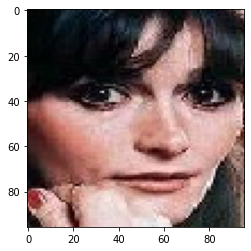

In [47]:
plt.imshow(x_test[302])
plt.show()

In [48]:
df_komparasi_2=df_komparasi[(df_komparasi['penjumlahan']==1)]

In [49]:
list=['48','56','80','87','116','146','155','162','223','229','273','283','289']

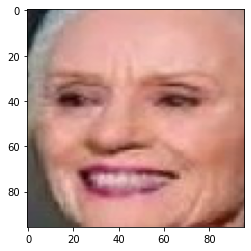

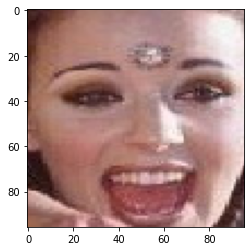

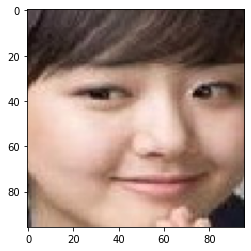

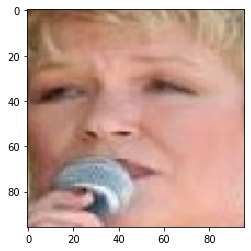

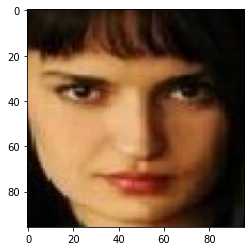

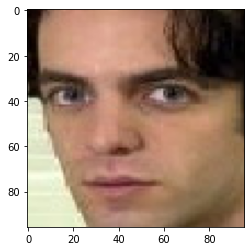

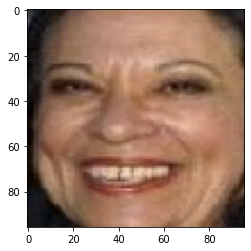

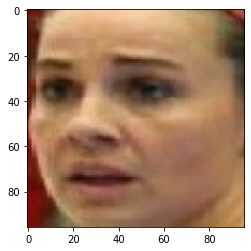

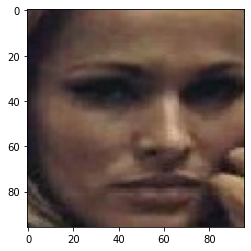

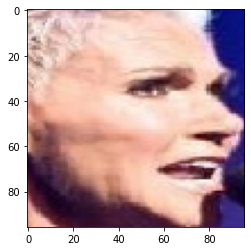

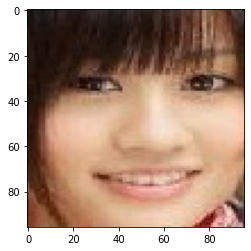

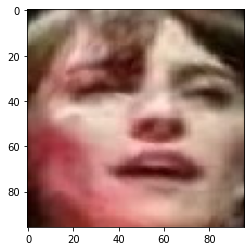

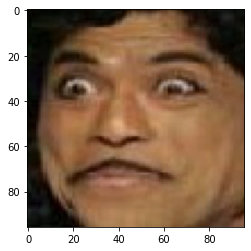

In [50]:
# Plotting sample of Pictures

for i in list:
    plt.imshow(x_sampel[int(i)])
    plt.show()
    
    
